In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.special
import seaborn as sns
from scipy.integrate import cumtrapz

dpi = 300
transparent = True
PI = np.pi
TWO_PI = 2*PI
NUM = 44000
show = False

sns.set_theme('paper')
sns.set_style("whitegrid")

(sec-complex-numbers)=
# Complex Numbers

The history of mathematics is a rich tapestry of discoveries and inventions. 
The Greeks, fascinated by geometry, introduced both natural and rational numbers but, intriguingly, neglected to incorporate negative numbers or zero.
Their experiences and understanding of the world, their perspectives on points, lines, and shapes -- grounded in classical Euclidean geometry -- kept these concepts hidden. Negative lengths or areas were unheard of.
They also seemed aware that there might be another category of number -- the irrational numbers -- beyond the rational.
Legend has it that a student of Pythagoras stumbled upon this notion, asserting that something other than rational numbers must exist for the existing mathematical theories to hold true. His audacity cost him his life.

As the world evolved, so did mathematical concepts.
The advent of sophisticated financial systems, underscored by the principles of credit and debt, gave birth to the concept of negative numbers.
After all, the balance between debt and credit necessitated the existence of a counterpart to a positive number in terms of addition.

"In summary, we rely on natural numbers to solve equations like $2x = 4$.
We require negative numbers for equations like $2x = -4$, rational numbers for equations such as $4x = 2$, and real numbers to tackle equations like $x^2 = 2$.
So, how do we approach the solution for

```{math}
:label: eq:complex:ex1
x^2 + 2 = 0?
```

We require [*complex numbers*](def-complex-number).
These numbers extend real numbers by definition, but their definition is not arbitrary.
Instead, it has been meticulously crafted so that complex numbers possess all necessary properties to be integrated into all known and accepted theories.
To define complex numbers, we introduce a special symbol $i$ (some prefer to use $j$), which is defined as follows:

```{math}
:label: eq:complex:i
i^2 := -1.
```

Again, complex numbers are invented but they are also discovered because everything works out, i.e., they have all the rich mathematical properties we desire and require.
Let us solve Eq. {eq}`eq:complex:ex1`:

$$x^2 = -2 = 2 i^2 \iff x = \sqrt{2i^2} = \sqrt{2} \sqrt{i^2} = \sqrt{2}i$$

``sclang`` provides a class called [Complex](https://doc.sccode.org/Classes/Complex.html).
Objects of that class represent complex numbers.
Let us solve Eq. {eq}`eq:complex:ex1` with ``sclang``:

```isc
n = Complex(real: -2, imag: 0) // -2
x = sqrt(n)                    // i*sqrt(2)
```

For complex numbers to be useful, they must be compatible with real numbers. 
For instance, what does the expression $i + 3$ represent, where $i$ is a complex number and $3$ is a real number?

```{admonition} Complex Numbers 
:name: def-complex-number
:class: definition
A *complex number*

\begin{equation}
z = (a + bi) \in \mathbb{C},
\end{equation}

with $i = \sqrt{-1}$, is the sum of a *real number* $a = \textbf{Re}(z) \in \mathbb{R}$ and an *imaginary number* $b = \textbf{Im}(z)$. 
```

A complex number $z$ has two parts: a real ``real`` and an imaginary ``imag`` part.
Note that squaring an imaginary number gives a real number, i.e. $(bi)^2 = -1b^2 = -b^2$.
Furthermore, we get $0 = 0 + 0i$, $bi = 0 + bi$, $a = a + 0i$.

Equality, addition, multiplication and negation works as expected.
There is however an additional special operation called *complex conjugation*.

```{admonition} Complex Conjugation 
:name: def-complex-conjugate
:class: definition
The conjugation $\overline{z}$ of a complex number $z = a + bi$ is the negation of its imaginary part, i.e., 

\begin{equation}
\overline{z} = \overline{a + bi} = \overline{a} + \overline{bi} = a - bi.
\end{equation}
```

```isc
n = Complex(real: 2, imag: 9)
n.conjugate // Complex(real: 2, imag: -9)
n.conjugate * n // Complex(real: 85, imag: 0)
```

Multiplying a complex number $z = a + bi$ by its conjugate gives us a real number:

$$z \cdot \overline{z} = (a + bi) \cdot (a - bi) = a^2 - (bi)^2 = a^2 + b^2.$$

We can use this fact to evaluate the division of two complex numbers $z_1 = a + bi, z_2 = c + di$:

$$\frac{a + bi}{c + di} = \frac{(a + bi)(c - di)}{(c + di)(c - di)} = \frac{ac-adi+bic+bdi^2}{c^2+d^2} = \frac{(ac+bd) + (bc-ad)i}{c^2+d^2}.$$

For example:

$$\frac{2 + i}{3 + 2i} = \frac{(2 + i)(3-2i)}{(3 + 2i)(3-2i)} = \frac{6 -4i + 3i -2i^2}{3^2 + 2^2} = \frac{8 -i}{13}.$$

```isc
Complex(2, 1) / Complex(3, 2)
```

(sec-complex-plane)=
## Complex Plane

We can represent a complex number $z = a + bi$ by a point $(a, b)$ in the *Cartesian plane*, which we then call *complex plane* or $z$*-plane*.

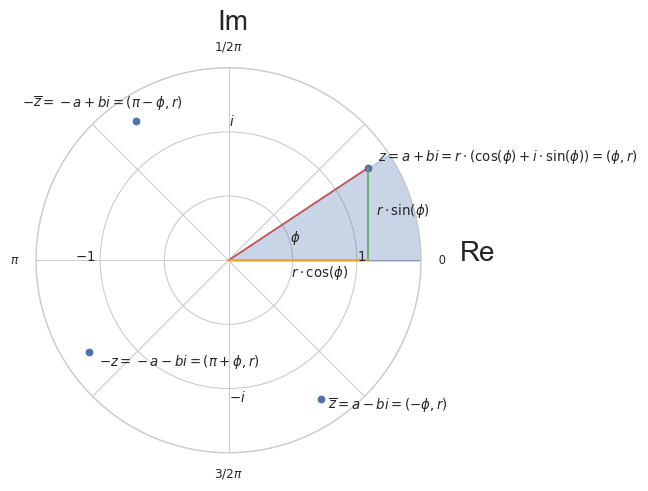

In [2]:
r = np.arange(0, (1.0/(2*np.pi))*(np.pi/4-0.2), 0.001)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.scatter([np.pi/4-0.2, -np.pi/4-0.2, -np.pi/4+np.pi-0.2,+np.pi/4+np.pi-0.2], [1.3, 1.3, 1.3,1.3], marker='o')
ax.plot([0, np.pi/4-0.2], [0, 1.3], color='r')
ax.plot([0, np.pi/4-0.2], [1.3*np.cos(np.pi/4-0.2), 1.3], color='g')
ax.plot([0, 0], [0, 1.3*np.cos(np.pi/4-0.2)], color='orange')

#ax.plot(2*np.pi*r, np.ones(len(r)), color='r')
ax.fill_between(2*np.pi*r, 0, np.ones(len(r))*1.5, color='b', alpha = 0.3)

ax.set_rmax(1.5)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks([0, 0.5, 1, 1.5])  # Less radial ticks
ax.set_yticklabels([r'', '', '', ''])  # Less radial ticks
ax.text(0,1.0,r'$1$')
ax.text(np.pi,1.2,r'$-1$')

ax.text(np.pi/2,1.05,r'$i$')
ax.text(np.pi*3/2,1.1,r'$-i$')

ax.text(np.pi/2+0.05,1.8,r'Im',size=20)
ax.text(0,1.8,r'Re',size=20)
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line

ax.text(0.3, 0.5, r'$\phi$')
ax.text(0.3, 1.2, r'$r \cdot \sin(\phi)$')
ax.text(-0.25, 0.5, r'$r \cdot \cos(\phi)$')

ax.text(np.pi/4-0.2,1.4,r'$z = a + bi = r \cdot (\cos(\phi) + i \cdot \sin(\phi)) = (\phi, r)$')
ax.text(-np.pi/4-0.2,1.4,r'$\overline{z} = a - bi = (-\phi, r)$')
ax.text(-np.pi/4+np.pi+0.15,2.0,r'$-\overline{z} = -a + bi = (\pi-\phi, r)$')
ax.text(+np.pi/4+np.pi-0.1,1.3,r'$-z = -a - bi = (\pi+\phi, r)$')
ax.grid(True);

This gives us another representation using the angle $\phi$ and the magnitude $r$ of the vector $(a, b)$.
We have

\begin{equation}
\begin{split}
a &= r \cdot \cos(\phi)\\
bi &= r \cdot i\sin(\phi)
\end{split}
\end{equation}

thus 

\begin{equation}
\begin{split}
z &= a + bi\\
  &= (r \cdot \cos(\phi)) + (r \cdot i \sin(\phi))\\
  &= r \cdot (\cos(\phi) + i \sin(\phi)).
\end{split}
\end{equation}

We write $z = (r, \phi)$, $z = a + bi$, $z = r \cdot (\cos(\phi) + i \sin(\phi))$ interchangeable.
Given $a$ and $b$, we can compute $r$ by

\begin{equation}
r^2 = a^2 + b^2 = z \cdot \overline{z}
\end{equation}

and $\phi$ using 

\begin{equation}
\phi = \cos^{-1}(a/r).
\end{equation}

```isc
(
var theta = 0.25*pi;
var z = Complex(cos(theta), sin(theta));
theta.postln;      // 0.78539816339745
z.postln;          // Complex( 0.70710678118655, 0.70710678118655 )
z.asPolar.postln;  // Polar( 1.0, 0.78539816339745 )
)
```

What happens geometrically if we multiply two complex numbers?
If one of the numbers is a real number, we just scale the magnitude.

Let $z_1 = r_1 \cdot (\cos(\alpha) + i \sin(\alpha))$ and $z_2 = r_2 \cdot (\cos(\beta) + i \sin(\beta))$ then

```{math}
:label: eq:complex:mul
\begin{split}
z_1 \cdot z_2 &= r_1 \cdot (\cos(\alpha) + i \sin(\alpha)) \cdot r_2 \cdot (\cos(\beta) + i \sin(\beta))\\
&= r_1r_2 \cdot (\cos(\alpha)\cos(\beta) + i\cos(\alpha)\sin(\beta) + i \sin(\alpha)\cos(\beta) + i^2 \sin(\alpha)\sin(\beta))\\
&= r_1r_2 \cdot [(\cos(\alpha)\cos(\beta) - \sin(\alpha)\sin(\beta)) + i (\cos(\alpha)\sin(\beta)+\sin(\alpha)\cos(\beta))] \\
&= r_1r_2 \cdot [\cos(\alpha+\beta) + i \sin(\alpha+\beta)]. 
\end{split}
```

The last step requires the trigonometry identities 

\begin{equation*}
\cos(\alpha)\cos(\beta) - \sin(\alpha)\sin(\beta) = \cos(\alpha + \beta)
\end{equation*}

and

\begin{equation*}
\cos(\alpha)\sin(\beta)+\sin(\alpha)\cos(\beta) = \sin(\alpha + \beta).
\end{equation*}

Eq. {eq}`eq:complex:mul` gives us some insights.
The product of two complex numbers equates to scaling and rotating by magnitude and angle of the second number respectively.

```{admonition} Product of Complex Numbers 
:name: theorem-complex-multiplication
:class: theorem
The product of two complex numbers is the product of their magnitudes and the sum of their angles.
```

Since $i = 1 \cdot (a \cos(90) + i\sin(90))$ holds, multiplying by $i$ equates to a counterclock rotation by 90 degrees.

Since $-i = 1 \cdot (a \cos(90) - i\sin(90)) = 1 \cdot (a \cos(90) + i\sin(-90))$, dividing by $i$ equates to multiplying by $-i$ thus

$$\frac{1}{i} = -i$$

and

$$\frac{1}{i} \cdot \frac{1}{i} = (-i)(-i) = -1.$$

From the rule of products of complex numbers *de Moivre's Theorem* follows.

```{admonition} De Moivre's Theorem 
:name: theorem-de-moivre
:class: theorem
Let $z = r \cdot (\cos(\phi) + i \sin(\phi))$ be a *complex number*, then

\begin{equation}
z^n = r^n (\cos(n\phi) + i \sin(n\phi))
\end{equation}

holds.
```

## Euler's Formula

*Euler's formula* or *Euler's equation* is one of the most beautiful relationships one can think of.
It connects *Euler's number* $e$, $0$, $1$ and $\pi$.
To arrive at the formula we first have to do some work.

```{admonition} Taylor Sries 
:name: def-taylor-series
:class: definition
Let $y(t)$ be a real or comlex-valued function that is infinitely differentiable at a real or complex number $z$, then 

\begin{equation}
\begin{split}
T_{y(z)}(t) &= f(z) + \frac{y'(z)}{1!}(t-z) + \frac{y''(z)}{2!}(t-z)^2 + \frac{y'''(z)}{3!}(t-z) + \ldots \\
&= \sum\limits_{k=0}^{\infty} \frac{y^{(k)}(z)}{k!}(t-z) = y(t)
\end{split}
\end{equation}

is the *Taylor series* of $f(t)$ at $t = z$.
If $z = 0$ the series is also called *Maclaurin series*.

```

One often approximates a function using only the initial terms of Taylor's series.
What we require are the Taylor series for sine, cosine, and the natural exponential functions.
We know that 

$$\sin'(t) = \cos(t) \text{ and } \cos'(t) = - \sin(t).$$

Furthermore, 

$$\sin(0) = 0 \text{ and } \cos(0) = 1.$$

Therefore, we get

```{math}
:label: eq:taylor:sin
\begin{split}
\sin(t) &= T_{\sin(0)}(t) = \sum\limits_{k=0}^{\infty} \frac{\sin^{(k)}(0)}{k!}(t)\\
&= 0 + t - 0 - \frac{t^3}{3!} + 0 + \frac{t^5}{5!} - 0 - \frac{t^7}{7!} + \ldots \\
&= t - \frac{t^3}{3!} +  \frac{t^5}{5!} - \frac{t^7}{7!} + \ldots
\end{split}
```

for the sine function.

```{figure} ../../../figs/sounddesign/math/taylor_sin.png
---
width: 800px
name: fig-taylor-sine
---
*Taylor series* that approximates $\sin(x)$ at $x=0$ using $1, 2, 3, 4, 5$ terms.
```

And we get 

```{math}
:label: eq:taylor:cos
\begin{split}
\cos(t) &= T_{\cos(0)}(t) = \sum\limits_{k=0}^{\infty} \frac{\cos^{(k)}(0)}{k!}(t)\\
&= 1 - 0 - \frac{t^2}{2!} + 0 + \frac{t^4}{4!} - 0 - \frac{t^6}{6!} + \ldots \\
&= 1 - \frac{t^2}{2!} + \frac{t^4}{4!} - \frac{t^6}{6!} + \ldots
\end{split}
```

for the cosine function.

```{figure} ../../../figs/sounddesign/math/taylor_cos.png
---
width: 800px
name: fig-taylor-cos
---
*Taylor series* that approximates $\cos(x)$ at $x=0$ using $1, 2, 3, 4, 5$ terms.
```

Furthermore, the natural exponential function has a quite nice form too, that is,

```{math}
:label: eq:taylor:euler
\begin{split}
e^t &= T_{e^0}(t) = \sum\limits_{k=0}^{\infty} \frac{\text{exp}^{(k)}(0)}{k!}t^k \\
&= \sum\limits_{k=0}^{\infty} \frac{t^k}{k!}
\end{split}
```

since $\text{exp}^{(k)}(t) = \text{exp}(t)$ for all $k \in \mathbb{N}_0$ and $e^0 = 1$.
Note that we donte $e^x$ by $\text{exp}(t)$.

```{figure} ../../../figs/sounddesign/math/taylor_exp.png
---
width: 300px
name: fig-taylor-exp
---
*Taylor series* that approximates $e^x$ at $x=0$ using $1, 2, 3, 4, 5$ terms.
```

What happens if we plug in an imaginary number like $\phi i$, with $\phi\in \mathbb{R}$?
Well let's see:

```{math}
\begin{split}
e^{\phi i} &= T_{e^0}(\phi i) = \sum\limits_{k=0}^{\infty} \frac{(\phi i)^k}{k!}\\
&= 1 + \frac{\phi i}{1!} + \frac{\phi^2i^2}{2!} + \frac{\phi^3i^3}{3!} + \frac{\phi^4i^4}{4!} + \frac{\phi^5i^5}{5!} + \frac{\phi^6i^6}{6!} \ldots \\
&= 1 + \frac{\phi i}{1!} - \frac{\phi^2}{2!} - \frac{\phi^3i}{3!} + \frac{\phi^4}{4!} + \frac{\phi^5i}{5!} - \frac{\phi^6}{6!} - \ldots \\
&= \left( 1 - \frac{\phi^2}{2!} + \frac{\phi^4}{4!} - \frac{\phi^6}{6!} + \ldots  \right) + i\left(\frac{\phi}{1!} - \frac{\phi^3}{3!} + \frac{\phi^5}{5!} - \ldots \right)\\
&= \cos(\phi) + i \sin(\phi).
\end{split}
```

We arrive at *Euler's formula* which links the hyperbolic functions, involving $e$, to trigonomeitric functions, involving $\pi$!

````{admonition} Euler's Formula
:name: theorem-euler-formula
:class: theorem
Let $i \phi$ be an imaginary number, then

```{math}
:label: eq:euler
e^{i\phi} = \cos(\phi) + i \sin(\phi)
```

holds. This relation is called *Euler's formula*.

````

```isc
exp(Complex(0, pi/3)) == Polar(1, pi/3).asComplex // true
```

We can immidiatly follow that

$$e^{i\pi} = \cos(\pi) + i \sin(\pi) = -1 + i0 = -1.$$

```isc
exp(Complex(0, pi)) + 1 < 0.00001  // true
exp(Complex(0, pi)) + 1 > -0.00001 // true
```

Therefore, the most beautiful formula of all times, called *Euler's identity*, emerges

\begin{equation}
e^{i\pi} + 1 = 0.
\end{equation}

Looking at Eq. {eq}`eq:euler` we immediately see that 

\begin{equation}
\forall \omega \in \mathbb{R}: |e^{i \omega}| = 1
\end{equation}

holds.
Therefore,

$$z = e^{i\omega} \Rightarrow |z^k| = 1.$$

I illustrate this fact by using $z = e^{i \frac{2\pi}{N}}$, i.e. $\omega = \frac{2\pi}{N}$ and the following plot, where the plotted points are defined by

$$z^k = e^{i \frac{2\pi}{N} k} \quad \text{ for } k = 0,1,2 \ldots, N-1 \text{ with } N=19.$$

All points lie on the red unit circle.

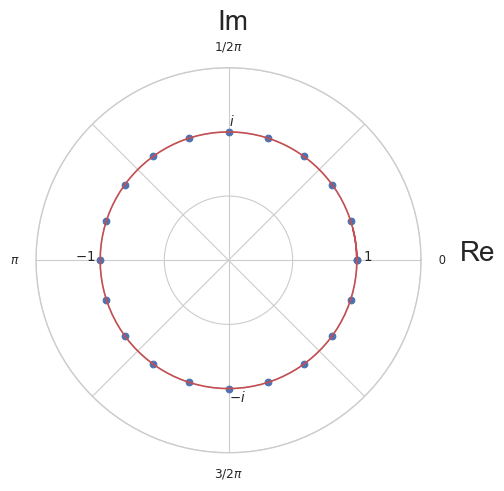

In [3]:
r = np.arange(0, 1.05, 0.05)
r2 = np.arange(0, 1.05, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': 'polar'})
ax.scatter(theta, np.ones(len(r)), marker='o')
#ax.plot([0, np.pi/4-0.2], [0, 1.0], color='r')

ax.plot(2*np.pi*r2, np.ones(len(r2)), color='r')
#ax.fill_between(2*np.pi*r, 0, np.ones(len(r))*1.5, color='b', alpha = 0.3)

ax.set_rmax(1.5)
ax.set_xticks([0, np.pi/4, 2*np.pi/4, 3*np.pi/4, 4*np.pi/4, 5*np.pi/4, 6*np.pi/4, 7*np.pi/4 ])
ax.set_xticklabels([r'0', r'', r'$1/2\pi$', r'', r'$\pi$', r'', r'$3/2\pi$', ''])
ax.set_rticks([0, 0.5, 1, 1.5])  # Less radial ticks
ax.set_yticklabels([r'', '', '', ''])  # Less radial ticks
ax.text(0,1.05,r'$1$')
ax.text(np.pi,1.2,r'$-1$')

ax.text(np.pi/2,1.05,r'$i$')
ax.text(np.pi*3/2,1.1,r'$-i$')

ax.text(np.pi/2+0.05,1.8,r'Im',size=20)
ax.text(0,1.8,r'Re',size=20)
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line

ax.grid(True);

Furthermore, we can see that the discrete function $g(k): \mathbb{Z} \rightarrow \mathbb{C}, g(z) = z^k$ is periodic and that its period is $N$:

$$g(N+1) = \left( e^{i \frac{2\pi}{N}} \right)^{N+1} = e^{i \frac{2\pi (N+1)}{N}} = e^{i 2\pi} \cdot e^{i \frac{2\pi}{N}} = e^{i 0} \cdot e^{i \frac{2\pi}{N}} = 1 \cdot e^{i \frac{2\pi}{N}} = z = g(1).$$

If $|z|$ would be greater than 1, then $z^k$ would grow to infinity and if $|z| < 1$, it would converge to $0$.

Using Eq. {eq}`eq:euler`, we can represent our well-known trigonometric functions by exponential functions.
We start with

$$(\cos(\phi) + i\sin(\phi)) + (\cos(\phi) - i\sin(\phi)) = 2 \cos(\phi) = e^{i\phi} + e^{-i\phi}.$$

Therefore, we get

\begin{equation}
\cos(\phi) = \frac{e^{i\phi} + e^{-i\phi}}{2}.
\end{equation}

For the sine we start with

$$(\cos(\phi) + i\sin(\phi)) - (\cos(\phi) - i\sin(\phi)) = 2i \sin(\phi) = e^{i\pi} - e^{-i\pi}.$$

Therefore, we get

\begin{equation}
\sin(\phi) = \frac{e^{i\phi} - e^{-i\phi}}{2i} = -i\frac{e^{i\phi} - e^{-i\phi}}{2}.
\end{equation}

(sec-phasors)=
## Phasors

Interestingly, by using *Euler's formula*, we can encode the **phase** and **amplitude** of a sinosoid by one very compact representation which we call *phasor*.

```{admonition} Phasor
:name: def-phasor
:class: definition
A *phasor* is the *polar representation* of any complex variable

\begin{equation}
\hat{r}_\phi = r e^{i\phi},
\end{equation}

where $r, \phi \in \mathbb{R}$.
It represents the amplitude and phase shift of some sinosoid.
```

We can define any sinosoid of the form

\begin{equation}
y(t) = r \cdot \cos(2\pi f t + \phi)
\end{equation}

using the **only the real part** of

\begin{equation}
\begin{split}
\underbrace{\hat{r}_\phi}_{\text{phasor}} \cdot \underbrace{e^{i 2\pi f t}}_{\text{circular motion}} &= r e^{i\phi} \cdot e^{i 2\pi f t} = r e^{i (2\pi f t + \phi)}\\
&= r \cdot (\cos(2\pi f t + \phi) + i \sin(2\pi f t + \phi))\\
&= y(t) + i r \sin(2\pi f t + \phi)),
\end{split}
\end{equation}

where the **phasor** $\hat{r}_\phi = r e^{i\phi}$ is a constant, $f$ is the **frequency**, and $\phi$ the **phase** of the sinusoid.
The *phasor* $\hat{r}_\phi$ tells us everything about the amplitude and the phase $\phi$ of the signal $y(t)$.

In many text books you will find 

\begin{equation}
r e^{i (\omega t + \phi)} = r \cdot (\cos(\omega t + \phi) + i \sin(\omega t + \phi)) = y(t) + i r \sin(\omega t + \phi))
\end{equation}

instead, where $\omega = 2\pi f$ is the *anglar speed* or *speed of rotation*.

```{figure} ../../../figs/sounddesign/math/phasor_function.jpeg
---
width: 500px
name: fig-phasor-function
---
A complex sinusoid $y(t) = r e^{i (2\pi f t + \phi)}$.
The phasor is the first red point, i.e. $y(0)$.
```

Remember, we can represent any audio signal as a sum of sinusoids. 
Since each phasor is also a vector, a sinusoid comprising multiple frequencies can be represented as a sum of *phasors*.

```{figure} ../../../figs/sounddesign/math/phasor_complex_function.jpeg
---
width: 500px
name: fig-phasor-complex-function
---
A complex sinusoid $y(t)$ defined by 3 phasors and 3 differen frequencies.
```